# Previsão de Preço de Casas com Regressão Linear
Este notebook faz uma análise exploratória, matriz de correlação e modelo de regressão linear para prever preços de casas com base em suas características.

In [1]:
# Importando bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 1 - Leitura do Dataset

In [2]:
df = pd.read_csv('/kaggle/input/housing-prices-dataset/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# 2 - Limpeza de Dados
- Remover linhas com valores nulos
- Garantir que as colunas numéricas estejam no formato correto

In [3]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


# 3 - Transformação e Normalização dos Dados
- Conversão de Variáveis categóricas
Colunas que possuem valores yes/no -> 1/0

In [4]:
colunas_binarias = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in colunas_binarias:
    df[col] = df[col].map({'yes': 1, 'no': 0})

# 4 - Matriz de Correlação

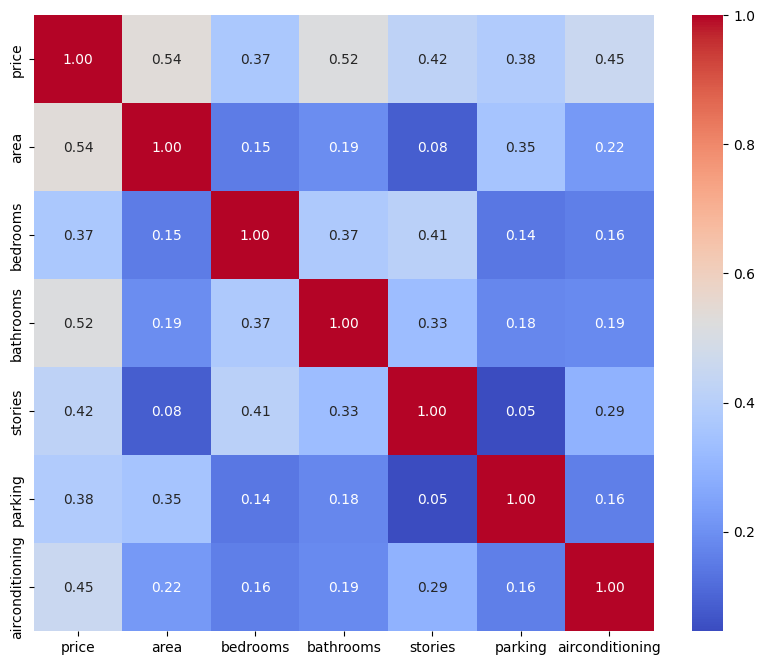

In [5]:
numeric_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'airconditioning']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

# 5 - Regressão Linear

In [6]:
# Definindo features e target
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'airconditioning', 'prefarea']
X = df[features]
y = df['price']

# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo e treinando
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)

# Previsões
y_pred = lr.predict(X_test)

# Avaliando o modelo
mse = mean_squared_error(y_test, y_pred)
r2score = lr.score(X_test, y_test)

print(f"Coeficientes: {lr.coef_}")
print(f"Intercepto: {lr.intercept_:.2f}")
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinação (R²): {r2score:.2f}")

# Impacto das features
print("\nImpacto das features no preço:")
for feat, coef in zip(features, lr.coef_):
    print(f"{feat}: {coef:,.2f}")

Coeficientes: [2.52928535e+02 1.02998522e+05 1.17330204e+06 3.81482470e+05
 2.72991993e+05 8.44621030e+05 8.12887988e+05]
Intercepto: 295876.30
Erro Quadrático Médio (MSE): 1955050222747.25
Coeficiente de Determinação (R²): 0.61

Impacto das features no preço:
area: 252.93
bedrooms: 102,998.52
bathrooms: 1,173,302.04
stories: 381,482.47
parking: 272,991.99
airconditioning: 844,621.03
prefarea: 812,887.99


# 6 - Comparação Preço Real vs Preço Previsto

In [7]:
df_test = X_test.copy()
df_test['Preço Real'] = y_test
df_test['Preço Previsto'] = y_pred
df_test.head()

,area,bedrooms,bathrooms,stories,parking,airconditioning,prefarea,Preço Real,Preço Previsto
316,5900,4,2,2,1,0,0,4060000,5.582710e+06
77,6500,3,2,3,0,1,1,6650000,7.397468e+06
360,4040,2,1,1,0,0,0,3710000,3.078489e+06
90,5000,3,1,2,0,1,0,6440000,4.650403e+06
493,3960,3,1,1,0,0,0,2800000,3.161253e+06


# 7 - Desvio Padrão dos Resíduos

In [8]:
residuos = y_test - y_pred
desvio_padrao = np.std(residuos)
print(f"Desvio padrão: R$ {desvio_padrao:,.2f}")

Desvio padrão: R$ 1,395,332.45


# 8 - Gráfico Preço Real x Preço Previsto

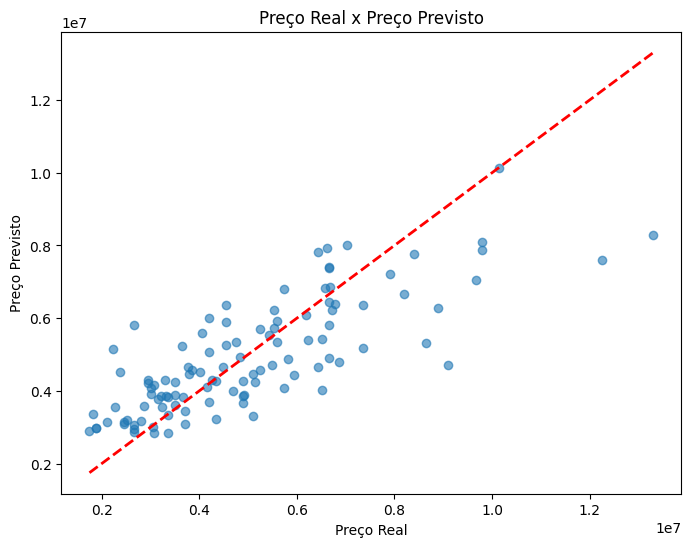

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Preço Real")
plt.ylabel("Preço Previsto")
plt.title("Preço Real x Preço Previsto")
plt.show()